In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/WineQuality.csv')
data.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White Wine,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6
1,White Wine,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6
2,White Wine,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6
3,White Wine,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6
4,White Wine,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5


In [ ]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64


In [ ]:
data.fillna(data.mean(), inplace=True)

<ipython-input-3-a20208f658ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
data['Type'].unique()

array(['White Wine', 'Red Wine', 'white', 'red'], dtype=object)

In [ ]:
data["Type"][data["Type"] == "white"] = 1
data["Type"][data["Type"] == "White Wine"] = 1
data["Type"][data["Type"] == "red"] = 0
data["Type"][data["Type"] == "Red Wine"] = 0

<ipython-input-5-956e0e04d839>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] == "white"] = 1
<ipython-input-5-956e0e04d839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] == "White Wine"] = 1
<ipython-input-5-956e0e04d839>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] == "red"] = 0
<ipython-input-5-956e0e04d839>:4: SettingWithCopyWarning: 
A value is 

In [ ]:
data

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.650000,10.4,6
1,1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.460000,11.7,6
2,1,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.490000,11.3,6
3,1,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.310000,12.5,6
4,1,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.280000,10.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38977,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
38978,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531452,11.2,6
38979,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
38980,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('quality',axis=1))

StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('quality',axis=1)
y=data['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm1=svm.score(X_test,y_test)

In [ ]:
print(svm1)

0.4774690038477982


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test)
y_pred_train=svm.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
accuracy2 = accuracy_score(y_test, y_pred)

print(f"Accuracy(Train): {accuracy1*100:.2f}%")

print(f"Accuracy(Test): {accuracy2*100:.2f}%")

Accuracy(Train): 48.09%
Accuracy(Test): 47.48%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_train, y_pred_train)

# Calculate Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test, y_pred)
mae2 = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared (R2) score
r21 = r2_score(y_test, y_pred)
r22 = r2_score(y_train, y_pred_train)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)

# Print the results
print("TEST:")
print(f"Mean Squared Error (MSE): {mse1:.2f}")
print(f"Root Mean Squared Error (MSE): {rmse1:.2f}")
print(f"Mean Absolute Error (MAE): {mae1:.2f}")
print(f"R-squared (R2) Score: {r21:.2f}")

print("TRAIN:")
print(f"Mean Squared Error (MSE): {mse2:.2f}")
print(f"Root Mean Squared Error (MSE): {rmse2:.2f}")
print(f"Mean Absolute Error (MAE): {mae2:.2f}")
print(f"R-squared (R2) Score: {r22:.2f}")



TEST:
Mean Squared Error (MSE): 0.75
Root Mean Squared Error (MSE): 0.87
Mean Absolute Error (MAE): 0.60
R-squared (R2) Score: 0.03
TRAIN:
Mean Squared Error (MSE): 0.73
Root Mean Squared Error (MSE): 0.85
Mean Absolute Error (MAE): 0.59
R-squared (R2) Score: 0.04


<Axes: xlabel='quality', ylabel='count'>

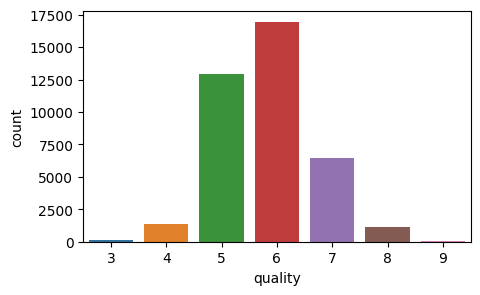

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='quality',data=data)

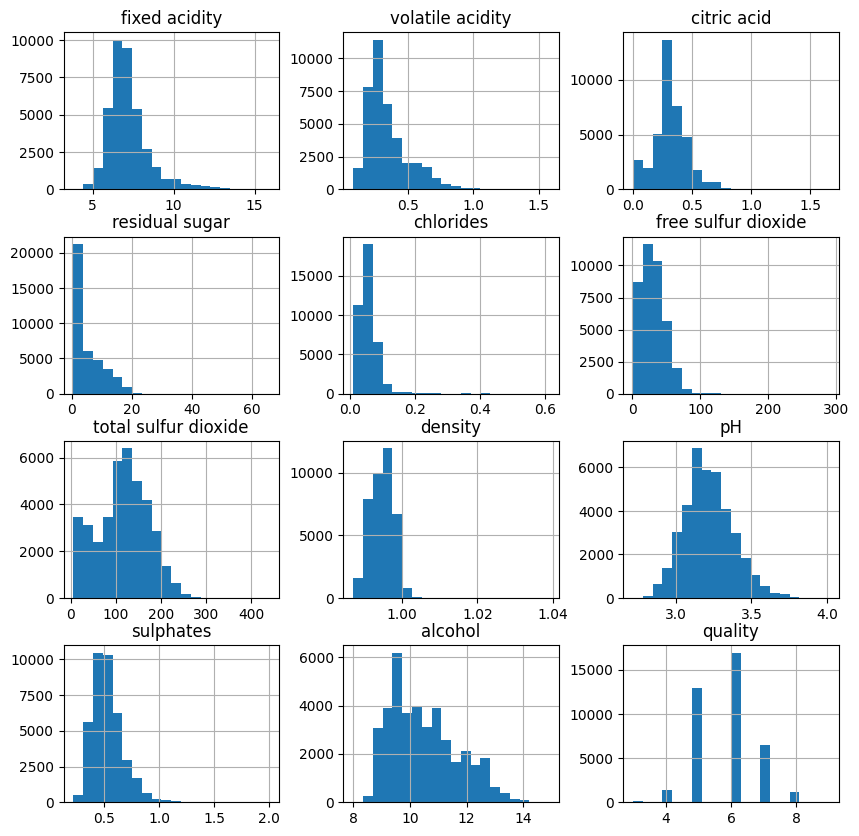

In [ ]:
data.hist(bins=20, figsize=(10,10))
plt.show()

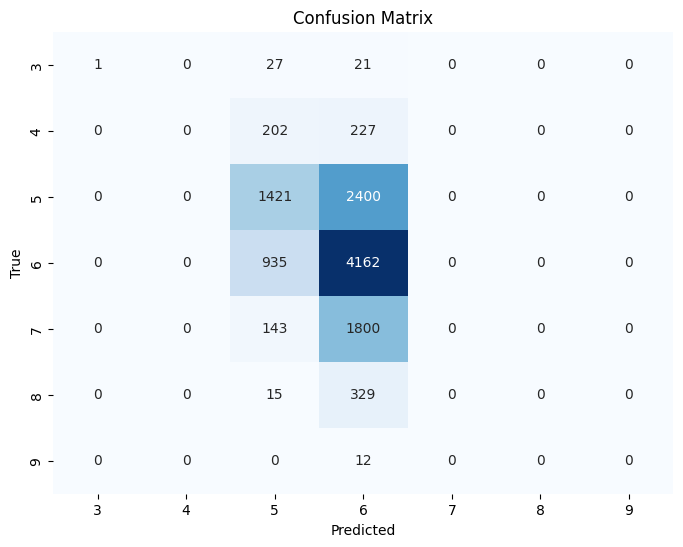

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[3,4,5,6,7,8,9],
            yticklabels=[3,4,5,6,7,8,9])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       1.00      0.02      0.04        49
           4       0.00      0.00      0.00       429
           5       0.52      0.37      0.43      3821
           6       0.46      0.82      0.59      5097
           7       0.00      0.00      0.00      1943
           8       0.00      0.00      0.00       344
           9       0.00      0.00      0.00        12

    accuracy                           0.48     11695
   macro avg       0.28      0.17      0.15     11695
weighted avg       0.38      0.48      0.40     11695



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


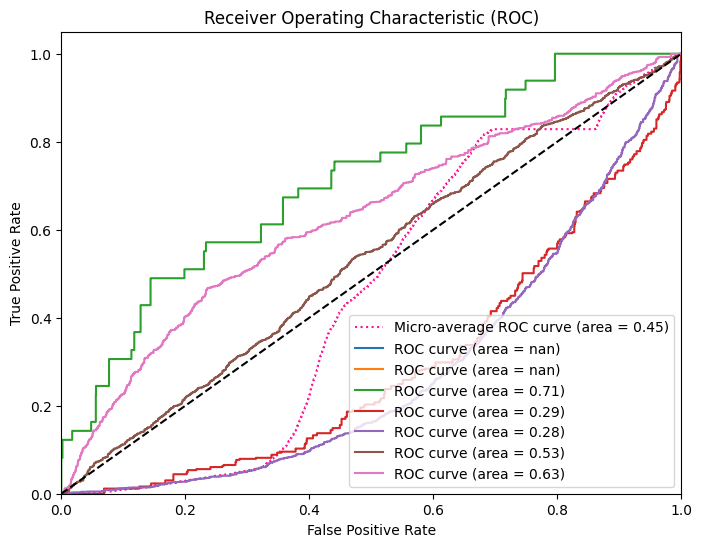

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import itertools

def plot_roc_curve_multiclass(y_test, y_score, n_classes):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  # Binarize the true labels
  y_test_bin = label_binarize(y_test, classes=range(1, n_classes + 1))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Plot ROC curves
  plt.figure(figsize=(8, 6))
  plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':')
  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label='ROC curve (area = {0:0.2f})'.format(roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

# Calculate the decision function scores for each class
y_score = svm.decision_function(X_test)

# Plot the ROC curve for multiclass classification
plot_roc_curve_multiclass(y_test, y_score, n_classes=7)